## 1. Bootstrap: Evaluando la relación entre publicidad y ventas

# Caso aplicado: Publicidad y ventas

**Escenario:** trabajas en el equipo de analítica de una empresa de marketing.  
La dirección quiere cuantificar **el efecto de la inversión en publicidad (X)** sobre **las ventas (y)** y entender **qué tan estable es esa relación**.

**Pregunta concreta:**  
- Por cada 1.000 € extra en publicidad, ¿cuánto aumentan las ventas?  
- ¿Es estable esta relación si cambiamos ligeramente la muestra de datos?

**Objetivo:** usar **bootstrap** para estimar la distribución de la relación inversión → ventas, obtener un intervalo de confianza (95%) y medir la incertidumbre.

- **Bootstrap**: re-muestreamos los datos muchas veces y recalculamos la relación en cada muestra.  
- Esto nos da un rango plausible para el efecto de la publicidad y permite decisiones más seguras.


Primeras filas del dataset simulado:
   Publicidad     Ventas
0    3.745401  11.410298
1    9.507143  27.923414
2    7.319939  22.143340
3    5.986585  13.984617
4    1.560186   4.241215 

Relación original: cada 1 unidad de publicidad → 2.91 unidades de venta
Intercept original: 0.43

Media bootstrap: 2.91
Error estándar bootstrap: 0.06
Bias: 0.00
Intervalo 95% (percentil): [2.79, 3.02]



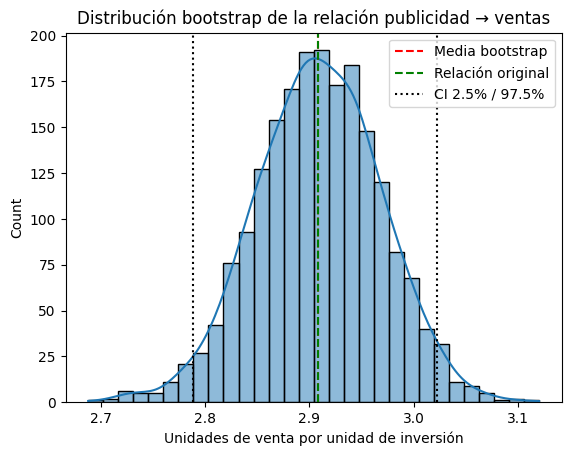

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


np.random.seed(42)  
n = 100 

# Inversión en publicidad (miles €), simulada uniformemente entre 0 y 10
X = np.random.uniform(0, 10, size=n)

# Ventas (miles unidades) = 3 * inversión + ruido normal
y = 3 * X + np.random.normal(0, 2, size=n)

data = pd.DataFrame({"Publicidad": X, "Ventas": y})

print("Primeras filas del dataset simulado:")
print(data.head(), "\n")

X_orig = data[["Publicidad"]].values
y_orig = data["Ventas"].values

model_orig = LinearRegression().fit(X_orig, y_orig)
slope_orig = model_orig.coef_[0]
intercept_orig = model_orig.intercept_

print(f"Relación original: cada 1 unidad de publicidad → {slope_orig:.2f} unidades de venta")
print(f"Intercept original: {intercept_orig:.2f}\n")

n_boot = 2000  # número de re-muestreos
slopes = np.empty(n_boot)

for i in range(n_boot):
    sample = data.sample(n, replace=True)
    model = LinearRegression().fit(sample[["Publicidad"]].values, sample["Ventas"].values)
    slopes[i] = model.coef_[0]

# Estadísticos
slope_mean = slopes.mean()
slope_se = slopes.std(ddof=1)
ci_lower, ci_upper = np.percentile(slopes, [2.5, 97.5])
bias = slope_mean - slope_orig

print(f"Media bootstrap: {slope_mean:.2f}")
print(f"Error estándar bootstrap: {slope_se:.2f}")
print(f"Bias: {bias:.2f}")
print(f"Intervalo 95% (percentil): [{ci_lower:.2f}, {ci_upper:.2f}]\n")

sns.histplot(slopes, bins=30, kde=True)
plt.axvline(slope_mean, color="red", linestyle="--", label="Media bootstrap")
plt.axvline(slope_orig, color="green", linestyle="--", label="Relación original")
plt.axvline(ci_lower, color="black", linestyle=":", label="CI 2.5% / 97.5%")
plt.axvline(ci_upper, color="black", linestyle=":")
plt.legend()
plt.title("Distribución bootstrap de la relación publicidad → ventas")
plt.xlabel("Unidades de venta por unidad de inversión")
plt.show()


La relación estimada entre inversión en publicidad y ventas es de aproximadamente 2.91 unidades de venta por cada 1 unidad de inversión, lo que coincide con la relación original del modelo.

El intervalo de confianza del 95% [2.79, 3.02] indica que, incluso si cambiamos ligeramente la muestra, la relación se mantiene bastante estable.

El bias cercano a 0 y un error estándar pequeño (0.06) confirman que la estimación es robusta y confiable.

En términos de negocio: podemos decir con seguridad que cada 1.000 € adicionales en publicidad se traducen en unas 2.900 unidades vendidas, y que esta estimación es consistente frente a variaciones de los datos.

## 2. Monte Carlo Simulation: Escenarios de inversión en publicidad

**Escenario:** además de analizar la estabilidad de la relación con bootstrap, la dirección quiere saber si esta relación se mantiene **en distintos mercados o escenarios hipotéticos**.

**Pregunta concreta:**  
- ¿Qué pasaría con la relación publicidad → ventas si repitiéramos el estudio en muchos mercados distintos?  
- ¿Es consistente el efecto de la publicidad sobre las ventas?

**Objetivo:** simular **muchos datasets completos** desde el modelo verdadero (Monte Carlo) para analizar la variabilidad de la relación estimada.


Media Monte Carlo: 3.00
Error estándar Monte Carlo: 0.07
Intervalo 95%: [2.86, 3.14]



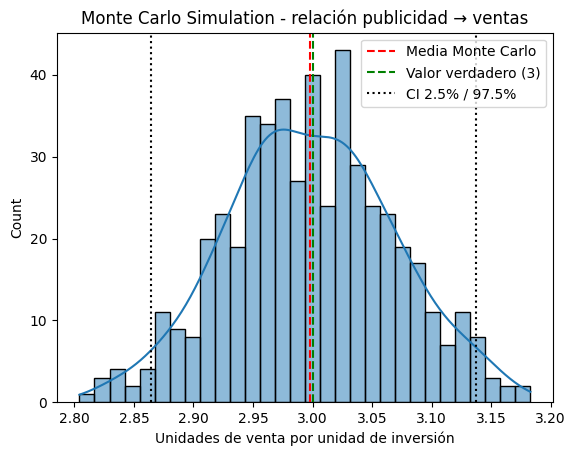

In [3]:
n_sim = 500   # número de datasets simulados
n = 100       # tamaño de cada dataset
slopes_mc = np.empty(n_sim)

for i in range(n_sim):
    # Simular inversión en publicidad (Uniforme entre 0 y 10)
    X_mc = np.random.uniform(0, 10, size=n)
    # Simular ventas (modelo verdadero con ruido normal)
    y_mc = 3 * X_mc + np.random.normal(0, 2, size=n)
    
    # Ajustar modelo
    model_mc = LinearRegression().fit(X_mc.reshape(-1,1), y_mc)
    slopes_mc[i] = model_mc.coef_[0]

slope_mean_mc = slopes_mc.mean()
slope_se_mc = slopes_mc.std(ddof=1)
ci_lower_mc, ci_upper_mc = np.percentile(slopes_mc, [2.5, 97.5])

print(f"Media Monte Carlo: {slope_mean_mc:.2f}")
print(f"Error estándar Monte Carlo: {slope_se_mc:.2f}")
print(f"Intervalo 95%: [{ci_lower_mc:.2f}, {ci_upper_mc:.2f}]\n")

sns.histplot(slopes_mc, bins=30, kde=True)
plt.axvline(slope_mean_mc, color="red", linestyle="--", label="Media Monte Carlo")
plt.axvline(3, color="green", linestyle="--", label="Valor verdadero (3)")
plt.axvline(ci_lower_mc, color="black", linestyle=":", label="CI 2.5% / 97.5%")
plt.axvline(ci_upper_mc, color="black", linestyle=":")
plt.legend()
plt.title("Monte Carlo Simulation - relación publicidad → ventas")
plt.xlabel("Unidades de venta por unidad de inversión")
plt.show()


La simulación Monte Carlo confirma que la relación estimada es muy estable en diferentes escenarios hipotéticos.  
Aunque haya variabilidad aleatoria entre mercados, la conclusión se mantiene:  
cada 1.000 € invertidos en publicidad generan, en promedio, unas **3.000 unidades vendidas**, con pequeñas fluctuaciones en torno a ese valor.

Tras estimar la relación publicidad → ventas, queremos comprobar si el modelo generaliza a datos nuevos y no solo se ajusta bien al conjunto observado.

¿El rendimiento del modelo es estable en diferentes particiones del mismo conjunto de datos?

¿Qué variabilidad tienen las métricas de rendimiento entre pliegues?

Aplicamos validación cruzada k-fold para estimar el rendimiento fuera de muestra del modelo y reportar media ± desviación típica de las métricas.

In [4]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Dataset simulado
n = 120
X = np.random.uniform(0,10,size=n).reshape(-1,1)
y = 3*X.flatten() + np.random.normal(0,2,size=n)

# Definir CV y métricas
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rmse = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true,y_pred))
scoring = {"R2": "r2", "RMSE": make_scorer(rmse, greater_is_better=False)}

# Modelo
pipe = Pipeline([("scaler", StandardScaler()), ("lr", LinearRegression())])

# Validación cruzada
res = cross_validate(pipe, X, y, cv=cv, scoring=scoring)

r2 = res["test_R2"]
rmse_vals = -res["test_RMSE"]

print(f"R² : {r2.mean():.3f} ± {r2.std():.3f}")
print(f"RMSE : {rmse_vals.mean():.3f} ± {rmse_vals.std():.3f}")


R² : 0.945 ± 0.012
RMSE : 1.989 ± 0.168


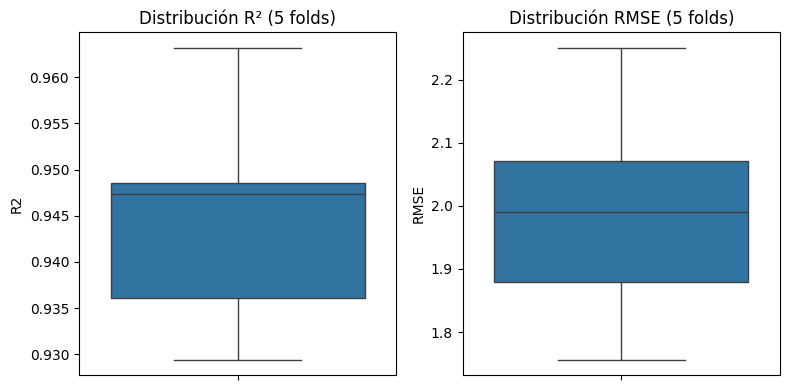

In [5]:
df = pd.DataFrame({"R2": r2, "RMSE": rmse_vals})
fig, axes = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(y=df["R2"], ax=axes[0]); axes[0].set_title("Distribución R² (5 folds)")
sns.boxplot(y=df["RMSE"], ax=axes[1]); axes[1].set_title("Distribución RMSE (5 folds)")
plt.tight_layout(); plt.show()

El modelo generaliza bien: explica de forma estable ~94% de la variabilidad en ventas (R^2=0.945) con un error bajo y consistente (RMSE≈2).